In [1]:
import numpy as np
from IPython.core.display import display, HTML
import tabulate
display(HTML('<h3>Student: Eduardo S. Ito (RA 159086)</h3>'))
display(HTML('<h3>Student: Thales E. Nazatto (RA 074388)</h3>'))
display(HTML('<h1>Project 2: Evolutionary Computing</h1>'))
from PIL import Image
import os
os.startfile('p2.pdf')

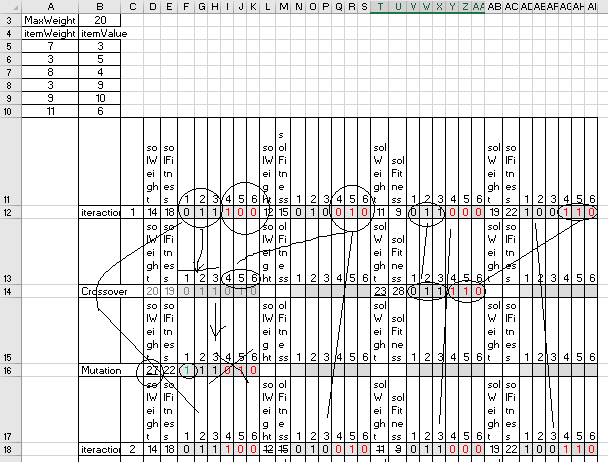

In [2]:
from IPython.core.display import display, HTML
import tabulate
display(HTML('<h2>Initial abstraction</h2>'))
from PIL import Image
path="abstraction.png"
display(HTML('<h3>Objective Function. </h3>'))
display(HTML('<p>The objective function is to fill up knapsack with more valuable products, respecting established maximum\
              weight. Each product has weight and value. The aim is to optimize the filling up of knapsack with more \
              value products and within the maximum weight, as precondition.</p>'))
display(Image.open(path))
display(HTML('<h3>Stop criteria. </h3>'))
display(HTML('<p>The Stop Criteria is reached when maximum value of filled knapsack within maximum weight, \
                 during 3 interactions</p>'))
display(HTML('<h3>References </h3>'))
display(HTML('<p>https://www.youtube.com/watch?v=9kbzMeEBvUY</p>'))

In [5]:
import random

def generate_population(size):
    population = []

    for i in range(0, size):
        while True:
            pop = random.choices([0, 1], k=11)
            print(pop, "Result:", apply_costs(pop), "Cargo:", apply_weights(pop))
            if apply_weights(pop) > cargo:
                print("Discarded")
            else:
                break

        population.append(pop)
    return population

def apply_costs(individual):
    cost = 0

    for i in range(0, len(individual)):
        cost += individual[i]*costs[i]

    return cost

def mean_costs(population):
    total = 0

    for i in range(0, len(population)):
        total += apply_costs(population[i])

    return total / len(population)

def apply_weights(individual):
    weight = 0

    for i in range(0, len(individual)):
        weight += individual[i] * weights[i]

    return weight


def choice_by_roulette(sorted_population):
    fitness_sum = sum(apply_costs(individual) for individual in sorted_population)
    draw = random.uniform(0, 1)

    accumulated = 0
    for individual in sorted_population:
        fitness = apply_costs(individual)
        probability = fitness / fitness_sum
        accumulated += probability

        if draw <= accumulated:
            return individual

    print(draw, accumulated)

def do_tournament(tournament):
    best = None
    for i in range(0,len(tournament)):
        ind = tournament[random.randint(0,len(tournament) - 1)]
        if (best == None) or apply_costs(ind) > apply_costs(best):
            best = ind

    return best

def roulette_pick(population):
    roulette = population[:]

    best = choice_by_roulette(roulette)
    second = choice_by_roulette(roulette)

    return best, second


def tournament_pick(population):
    tournament = population[:]

    best = do_tournament(tournament)

    tournament.remove(best)
    second = do_tournament(tournament)

    return best, second

def selection(population):
    return tournament_pick(population) if tournament else roulette_pick(population)

def sort_population_by_fitness(population):
    return sorted(population, key=apply_costs)


def crossover(individual_a, individual_b):
    n = len(individual_a)
    c = random.randint(0, n - 1)
    return individual_a[0:c] + individual_b[c:n]


def mutate(individual):
    n = len(individual)
    c = random.randint(0, n - 1)
    m = random.randint(0, 1)
    individual[c] = m
    return individual


def make_next_generation(previous_population):
    next_generation = []
    sorted_by_fitness_population = sort_population_by_fitness(previous_population)
    population_size = len(previous_population)

    if tournament:
        selection = tournament_pick

    while (len(next_generation) < population_size):
        cross_prob = random.random()
        mut_prob = random.random()
        if cross_prob < crossover_probability:
            first_choice, second_choice = selection(sorted_by_fitness_population)

            individual = crossover(first_choice, second_choice)
        else:
            individual = choice_by_roulette(sorted_by_fitness_population)

        if mut_prob < mutation_probability:
            individual = mutate(individual)

        if apply_weights(individual) > cargo:
            print(individual, "discarded because", apply_weights(individual), ">", cargo)
        else:
            next_generation.append(individual)

    if elitism:
        if len(previous_population) == len(next_generation):
            next_generation.append(previous_population[0])
        else:
            individual_to_swap = sort_population_by_fitness(next_generation)[0]

            for i in range(0, len(next_generation)):
                if individual_to_swap == next_generation[i]:
                    next_generation[i] = previous_population[0]

    return next_generation

def run_case():
    population = generate_population(population_size)

    i = 1
    while True:
        print(f"Generation {i}")

        for individual in population:
            print(individual, "Result:", apply_costs(individual), "Cargo:", apply_weights(individual))

        best_fitness = apply_costs(sort_population_by_fitness(population)[-1])
        worst_fitness = apply_costs(sort_population_by_fitness(population)[0])
        mean_fitness = mean_costs(population)

        print()
        print("Best:", best_fitness, "Mean:", mean_fitness, "Worst:", worst_fitness)
        print()

        if i == generations:
            break

        i += 1

        population = make_next_generation(population)

    best_individual = sort_population_by_fitness(population)[-1]
    print("\nBest choice: ")
    print(best_individual, "Result:", apply_costs(best_individual), "Cargo:", apply_weights(best_individual))

In [7]:
# Configuration 1: Cargo case
#Problem variables
costs = [100, 350, 200, 90, 500, 250, 220, 360, 150, 700, 400]
weights = [50, 90, 30, 40, 100, 70, 20, 80, 80, 90, 50]
cargo = 500

#GA variables
generations = 100
population_size = 100
crossover_probability = 0.8
mutation_probability = 0.2
tournament = True
elitism = True
run_case(costs, weigths, cargo, generations,population_size, crossover_probability, \
        mutation_probability, tournament, elitism)

ValueError: too many values to unpack (expected 2)

In [ ]:
# Configuration 2: Knapsack problem
#Problem variables
costs = [100, 350, 200, 90, 500, 250, 220, 360, 150, 700, 400]
weights = [50, 90, 30, 40, 100, 70, 20, 80, 80, 90, 50]
cargo = 500

#GA variables
generations = 100
population_size = 100
crossover_probability = 0.8
mutation_probability = 0.2
tournament = True
elitism = True
run_case(costs, weigths, cargo, generations,population_size, crossover_probability, \
        mutation_probability, tournament, elitism)